In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
mit_df= pd.read_csv('Python_Preprocessed_Metro_Interstate_Traffic_Volume.csv')
# i have preprocessed the the Metro_Interstate_Traffic_Volume.csv file in the RandomForest_Python File


In [3]:
mit_df.head()

,Unnamed: 0,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,dayOfWeek,month,holiday_1,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,0,288,0,0,40,5545,9,1,10,1,...,0,0,0,0,0,0,0,0,0,0
1,1,289,0,0,75,4516,10,1,10,1,...,0,0,0,0,0,0,0,0,0,0
2,2,289,0,0,90,4767,11,1,10,1,...,0,0,0,0,0,0,0,0,0,0
3,3,290,0,0,90,5026,12,1,10,1,...,0,0,0,0,0,0,0,0,0,0
4,4,291,0,0,75,4918,13,1,10,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
 mit_df=mit_df.drop('Unnamed: 0', axis=1)
    # droping the unwanted column

In [5]:
print(mit_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48187 entries, 0 to 48186
Data columns (total 58 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   temp                                                     48187 non-null  int64
 1   rain_1h                                                  48187 non-null  int64
 2   snow_1h                                                  48187 non-null  int64
 3   clouds_all                                               48187 non-null  int64
 4   traffic_volume                                           48187 non-null  int64
 5   hour                                                     48187 non-null  int64
 6   dayOfWeek                                                48187 non-null  int64
 7   month                                                    48187 non-null  int64
 8   holiday_1                                     

In [6]:
mit_df=mit_df.astype(int)

In [7]:
from sklearn.model_selection import train_test_split


X = mit_df.drop('traffic_volume', axis=1)
y = mit_df['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [9]:

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score


train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE:{train_mse:.2f},R²:{train_r2:.2f}")
print(f"Testing MSE:{test_mse:.2f},R²:{test_r2:.2f}")


Training MSE:3260943.59,R²:0.17
Testing MSE:20379847.06,R²:-4.09


In [11]:
import numpy as np
from sklearn.metrics import mean_absolute_error
# RMSE
rmse_lr= np.sqrt(test_mse)

# MAE
mae_lr= mean_absolute_error(y_test,y_test_pred)
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")

Root Mean Squared Error (RMSE): 4514.404396682666
Mean Absolute Error (MAE): 1631.2043920763363


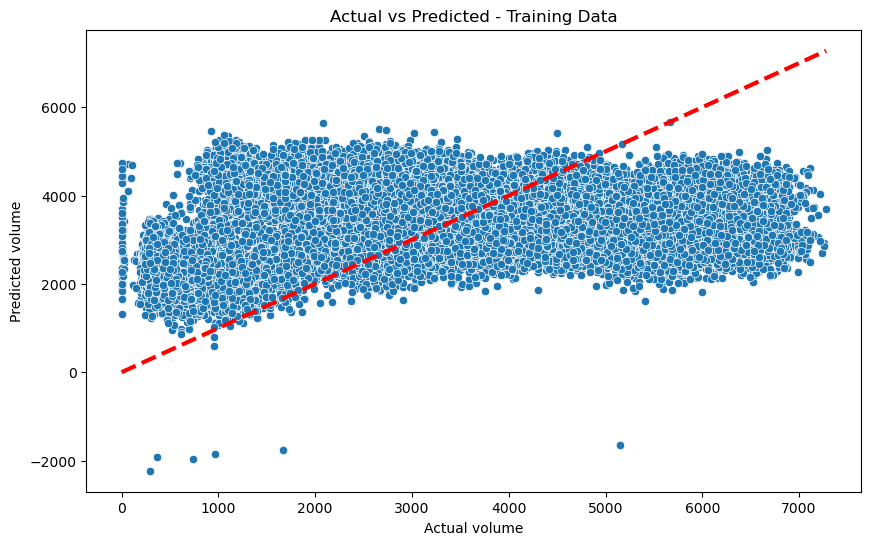

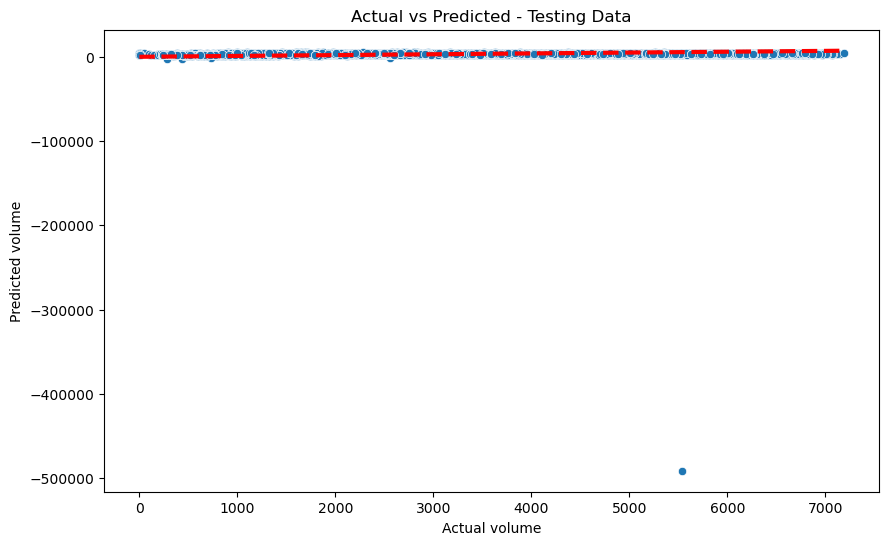

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=3)
    plt.xlabel('Actual volume')
    plt.ylabel('Predicted volume')
    plt.title(title)
    plt.show()

plot_predictions(y_train, y_train_pred, 'Actual vs Predicted - Training Data')
plot_predictions(y_test, y_test_pred, 'Actual vs Predicted - Testing Data')


In [13]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge= Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)
y_test_pred_ridge = ridge.predict(X_test)
print(f"Ridge Regression R²: {r2_score(y_test, y_test_pred_ridge):.2f}")



Ridge Regression R²: -4.01


In [14]:
# Lasso Regression

lasso= Lasso(alpha=0.01) 
lasso.fit(X_train, y_train)
y_test_pred_lasso = lasso.predict(X_test)
print(f"Lasso Regression R²: {r2_score(y_test, y_test_pred_lasso):.2f}")

Lasso Regression R²: -4.04


C:\Users\tenyj\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.340e+10, tolerance: 1.324e+07
  model = cd_fast.enet_coordinate_descent(


In [15]:
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# using RFE
selector = RFE(estimator=LinearRegression(), n_features_to_select=10)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


In [16]:
model = LinearRegression()
model.fit(X_train_selected, y_train)
y_test_pred = model.predict(X_test_selected)
print(f"R² with RFE: {r2_score(y_test, y_test_pred):.2f}")



R² with RFE: 0.00


In [17]:
# appling PCA
pca = PCA(n_components=10) 
pipeline = make_pipeline(StandardScaler(), pca, LinearRegression())
pipeline.fit(X_train, y_train)
y_test_pred_pca = pipeline.predict(X_test)
print(f"R² with PCA: {r2_score(y_test, y_test_pred_pca):.2f}")

R² with PCA: -0.16
